In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df_answers = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', 'Quest1_before', 'Quest2_before'],
    index_col='ID'
)

df_quest = pd.read_csv(
    '/Users/martasolarz/Studies/Thesis/data/survey.csv',
    usecols=['ID', 'Quest1_after', 'Quest2_after'],
    index_col='ID'
)

df_merge = df_answers.merge(df_quest, on='ID')
df_merge['Quest1_before'] = df_merge['Quest1_before'].apply(lambda x: 'wiele form prezentacji' if x == 'B' else 'tylko mapa')
df_merge['Quest1_after'] = df_merge['Quest1_after'].apply(lambda x: 'wiele form prezentacji' if x == 'B' else 'tylko mapa')
df_merge['Quest2_before'] = pd.Categorical(df_merge['Quest2_before'], categories=['mapa', 'tabela', 'wykres', 'tekst'], ordered=True)
df_merge['Quest2_after'] = pd.Categorical(df_merge['Quest2_after'], categories=['mapa', 'tabela', 'wykres', 'tekst'], ordered=True)
df_merge.head()

,Quest1_before,Quest2_before,Quest1_after,Quest2_after
ID,,,,
1,wiele form prezentacji,wykres,wiele form prezentacji,wykres
2,wiele form prezentacji,wykres,wiele form prezentacji,wykres
3,wiele form prezentacji,mapa,wiele form prezentacji,mapa
4,wiele form prezentacji,mapa,wiele form prezentacji,wykres
5,wiele form prezentacji,tabela,wiele form prezentacji,tabela


/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_9954/2920411936.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Przed badaniem', 'Po badaniu'])


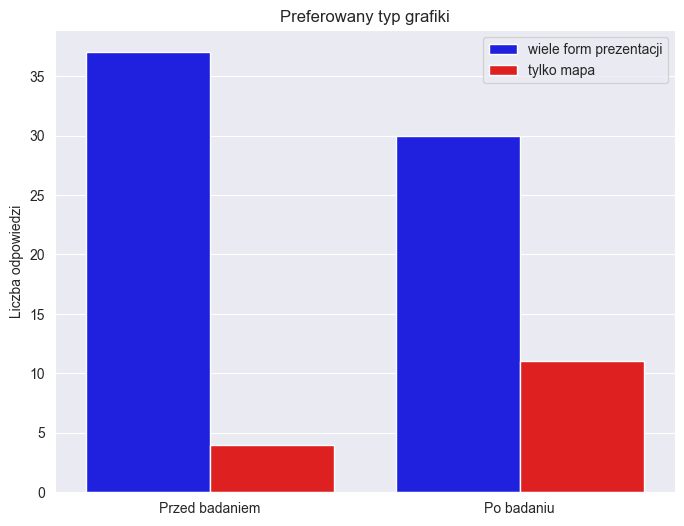

In [45]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="variable", hue="value", data=pd.melt(df_merge[["Quest1_before", "Quest1_after"]]), palette={"tylko mapa": "red", "wiele form prezentacji": "blue"})
ax.set_xlabel('')
ax.set_ylabel('Liczba odpowiedzi')
ax.set_title('Preferowany typ grafiki')
ax.legend()
ax.set_xticklabels(['Przed badaniem', 'Po badaniu'])
plt.show()

/var/folders/vw/8y99f8gn61ddx6t8ck0zm6ch0000gn/T/ipykernel_9954/2130272431.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Przed badaniem', 'Po badaniu'])


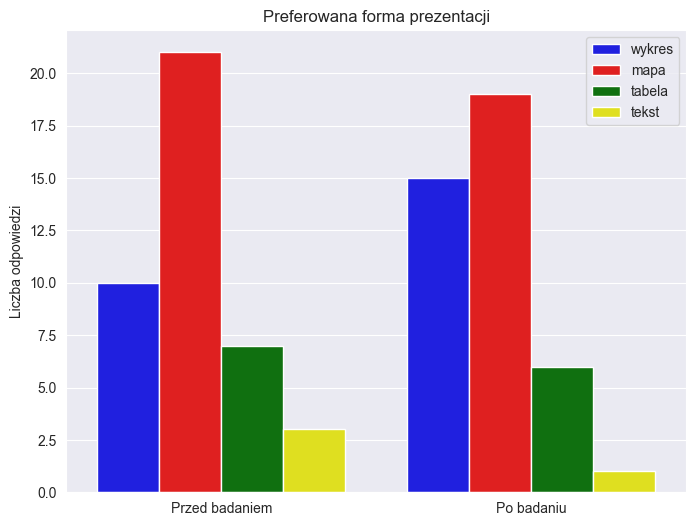

In [48]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x="variable", hue="value", data=pd.melt(df_merge[["Quest2_before", "Quest2_after"]]), palette={"mapa": "red", "wykres": "blue", "tabela": "green", "tekst": "yellow"})
ax.set_xlabel('')
ax.set_ylabel('Liczba odpowiedzi')
ax.set_title('Preferowana forma prezentacji')
ax.legend()
ax.set_xticklabels(['Przed badaniem', 'Po badaniu'])
plt.show();

In [55]:
df = pd.DataFrame(
    [df_merge['Quest1_before'].value_counts(), df_merge['Quest1_after'].value_counts()]
).T.rename(columns={'Quest1_before':'przed badaniem', 'Quest1_after': 'po badaniu'})

In [56]:
df

,przed badaniem,po badaniu
wiele form prezentacji,37,30
tylko mapa,4,11


In [59]:
df.to_csv('quest1.csv', index=True)

In [60]:
df = pd.DataFrame(
    [df_merge['Quest2_before'].value_counts(), df_merge['Quest2_after'].value_counts()]
).T.rename(columns={'Quest2_before':'przed badaniem', 'Quest2_after': 'po badaniu'})

In [61]:
df

,przed badaniem,po badaniu
mapa,21,19
wykres,10,15
tabela,7,6
tekst,3,1


In [62]:
df.to_csv('quest2.csv', index=True)

In [75]:
df_map = pd.DataFrame()

def changes(x):
    form = 'tekst'
    if x[0] == form and x[1] != form:
        return True
    else:
        return False
    
# df_merge['mapa'] = df_merge[['Quest2_before', 'Quest2_after']].apply(changes, axis=1)

df_merge

,Quest1_before,Quest2_before,Quest1_after,Quest2_after,mapa,tabela,wykres
ID,,,,,,,
1,wiele form prezentacji,wykres,wiele form prezentacji,wykres,False,False,False
2,wiele form prezentacji,wykres,wiele form prezentacji,wykres,False,False,False
3,wiele form prezentacji,mapa,wiele form prezentacji,mapa,False,False,False
4,wiele form prezentacji,mapa,wiele form prezentacji,wykres,True,False,False
5,wiele form prezentacji,tabela,wiele form prezentacji,tabela,False,False,False
6,wiele form prezentacji,wykres,wiele form prezentacji,mapa,False,False,True
7,wiele form prezentacji,tekst,wiele form prezentacji,wykres,False,False,False
11,wiele form prezentacji,mapa,wiele form prezentacji,wykres,True,False,False
12,wiele form prezentacji,mapa,wiele form prezentacji,mapa,False,False,False


In [76]:
# df_merge['tabela'] = df_merge[['Quest2_before', 'Quest2_after']].apply(changes, axis=1)
# df_merge['wykres'] = df_merge[['Quest2_before', 'Quest2_after']].apply(changes, axis=1)
df_merge['tekst'] = df_merge[['Quest2_before', 'Quest2_after']].apply(changes, axis=1)

In [77]:
df_merge

,Quest1_before,Quest2_before,Quest1_after,Quest2_after,mapa,tabela,wykres,tekst
ID,,,,,,,,
1,wiele form prezentacji,wykres,wiele form prezentacji,wykres,False,False,False,False
2,wiele form prezentacji,wykres,wiele form prezentacji,wykres,False,False,False,False
3,wiele form prezentacji,mapa,wiele form prezentacji,mapa,False,False,False,False
4,wiele form prezentacji,mapa,wiele form prezentacji,wykres,True,False,False,False
5,wiele form prezentacji,tabela,wiele form prezentacji,tabela,False,False,False,False
6,wiele form prezentacji,wykres,wiele form prezentacji,mapa,False,False,True,False
7,wiele form prezentacji,tekst,wiele form prezentacji,wykres,False,False,False,True
11,wiele form prezentacji,mapa,wiele form prezentacji,wykres,True,False,False,False
12,wiele form prezentacji,mapa,wiele form prezentacji,mapa,False,False,False,False


In [105]:
df_map = df_merge[df_merge['mapa'] == True][['Quest2_after']]
df_tab = df_merge[df_merge['tabela'] == True][['Quest2_after']]
df_wykres = df_merge[df_merge['wykres'] == True][['Quest2_after']]
df_txt = df_merge[df_merge['tekst'] == True][['Quest2_after']]
df = df_merge[['mapa', 'tabela', 'wykres', 'tekst']]
df_map_save = pd.DataFrame(
    [df_map['Quest2_after'].value_counts(), df_tab['Quest2_after'].value_counts(), df_wykres['Quest2_after'].value_counts(), df_txt['Quest2_after'].value_counts() ]
).T
df_map_save.columns = ['mapa_before', 'tabela_before', 'wykres_before', 'tekst_before']
df_map_save

,mapa_before,tabela_before,wykres_before,tekst_before
wykres,6,3,0,2
tabela,4,0,0,0
tekst,1,0,0,0
mapa,0,2,6,1


In [103]:
df_txt['Quest2_after'].value_counts()

wykres    2
mapa      1
tabela    0
tekst     0
Name: Quest2_after, dtype: int64

In [104]:
df_map_save.to_csv('changes_quest2.csv', index=True)

In [106]:
df

,mapa,tabela,wykres,tekst
ID,,,,
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,True,False,False,False
5,False,False,False,False
6,False,False,True,False
7,False,False,False,True
11,True,False,False,False
12,False,False,False,False


In [107]:
df.to_csv('changes_people.csv', index=True)